<a href="https://colab.research.google.com/github/vn322/Synergy_DBM_301_CS/blob/main/Keras6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Callbacks Keras

Сегодня обсудим:
1. Что такое callback?
2. Для чего callback нужен при обучении нейросети?
3. Рассмотрим основные callback на Keras

Получение данных

Описание датасета:

- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per 10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

In [ ]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

X_train.shape, X_test.shape

((404, 13), (102, 13))

In [ ]:
X_train[:1]

array([[  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
         91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
         18.72   ]])

Масштабирование данных

In [ ]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

mean, std

(array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
        5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
        9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
        1.27408168e+01]),
 array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
        1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
        8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
        7.24556085e+00]))

In [ ]:
X_train -= mean
X_train /= std

X_test -= mean
X_test /= std

In [ ]:
X_train.mean(axis=0)

array([-1.01541438e-16,  1.09923072e-17,  1.74337992e-15, -1.26686340e-16,
       -5.25377321e-15,  6.41414864e-15,  2.98441140e-16,  4.94653823e-16,
        1.12671149e-17, -1.98136337e-16,  2.36686358e-14,  5.95679996e-15,
        6.13920356e-16])

In [ ]:
X_train.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Архитектура сети


Определение сети через класс Sequential и добавление слоев в него через add

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
tf.random.set_seed(9)


model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1], )))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

### Обучение сети

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50, 
                    validation_data=(X_test, y_test))

Epoch 1/50
13/13 [==============================] - 1s 19ms/step - loss: 568.1458 - mae: 21.9958 - val_loss: 586.9446 - val_mae: 22.4357
Epoch 2/50
13/13 [==============================] - 0s 4ms/step - loss: 548.3544 - mae: 21.5271 - val_loss: 566.4633 - val_mae: 21.9536
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 526.5145 - mae: 20.9990 - val_loss: 542.5834 - val_mae: 21.3806
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 500.7500 - mae: 20.3578 - val_loss: 514.4185 - val_mae: 20.6882
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 470.4189 - mae: 19.5854 - val_loss: 480.9787 - val_mae: 19.8343
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 434.6254 - mae: 18.6555 - val_loss: 442.5670 - val_mae: 18.8151
Epoch 7/50
13/13 [==============================] - 0s 4ms/step - loss: 394.5962 - mae: 17.5325 - val_loss: 398.4568 - val_mae: 17.6801
Epoch 8/50
13/13 [=============================

In [ ]:
history.history

{'loss': [568.145751953125,
  548.3544311523438,
  526.5145263671875,
  500.7500305175781,
  470.41888427734375,
  434.62542724609375,
  394.5962219238281,
  349.917236328125,
  299.5508117675781,
  246.4727325439453,
  193.19140625,
  146.8640899658203,
  115.75017547607422,
  95.54859924316406,
  81.50202941894531,
  70.6172103881836,
  60.85331726074219,
  53.46826171875,
  46.8867073059082,
  41.89142608642578,
  37.700889587402344,
  34.51081848144531,
  31.80191421508789,
  29.634727478027344,
  28.002803802490234,
  26.507484436035156,
  25.221569061279297,
  24.251182556152344,
  23.269088745117188,
  22.434255599975586,
  21.70208168029785,
  21.174062728881836,
  20.539318084716797,
  20.025815963745117,
  19.54646110534668,
  18.993345260620117,
  18.620819091796875,
  18.03410530090332,
  17.670673370361328,
  17.250192642211914,
  16.908100128173828,
  16.55420684814453,
  16.278331756591797,
  15.989215850830078,
  15.61890697479248,
  15.324657440185547,
  15.13190937042

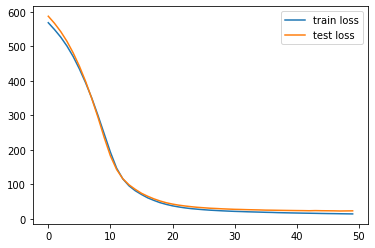

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend();

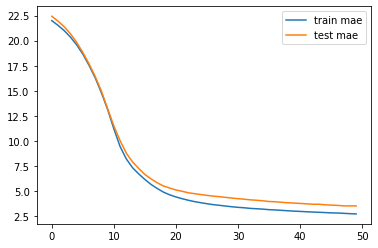

In [ ]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='test mae')
plt.legend();

### Callbacks

> callbacks: List of `keras.callbacks.Callback` instances.<br>
        List of callbacks to apply during training.<br>
        See `tf.keras.callbacks`. Note `tf.keras.callbacks.ProgbarLogger`
        and `tf.keras.callbacks.History` callbacks are created automatically
        and need not be passed into `model.fit`.

Callback (обратные вызовы) – набор функций, применяемых в определенные моменты во время процедуры обучения. Вы можете использовать функции callback чтобы получить информацию о внутреннем состоянии модели в процессе обучения. Нужно передавать список callback’ов (именованным аргументом callbacks) методу .fit() модели. Подходящие методы callback будут вызваны на каждой стадии обучения.

Рассмотрим основные callback'и, с остальными можете ознакомиться в [документации](https://ru-keras.com/callbacks/).

#### ModelCheckpoint


Сохранение модели после каждой эпохи.

Filepath может содержать именованные опции форматирования, заполняемые значениями epoch и ключами в logs (передаваемыми on_epoch_end).

К примеру: если filepath назван weights.{epoch:02d}-{val_loss:.2f}.hdf5, тогда модель будет сохраняться с номером эпохи и validation_loss в имени файла.

**Аргументы:**

— filepath: строка, путь сохранения модели

— monitor: параметр для мониторинга

— verbose: режим отображения, 0 или 1

— save_best_only: если save_best_only=True, если результат текущей эпохи хуже предыдущей, он не будет сохранен.

— save_weights_only: если True, тогда будут сохраняться только веса модели (model.save_weights(filepath)), в противном случае будет сохраняться вся модель (model.save(filepath)).

— mode: один из {auto, min, max}. Если save_best_only=True, решение о перезаписи текущего файла будет приниматься в зависимости от уменьшения/увеличения параметра мониторинга. Для val_acc, необходим max, для val_loss необходим min. В auto режиме, mode выбирается в зависимости от имени monitor.

— save_freq: `'epoch'` или integer. Если `'epoch'`, то сохраняется модель после каждой эпохиh. Когда integer, то сохранение модели через это кол-во батчей.


In [ ]:
from keras import callbacks

model_checkpoint = callbacks.ModelCheckpoint(filepath='model_best_{epoch}.h5',
                                             monitor='val_mae',
                                             verbose=1,
                                             save_best_only=True,
                                             save_weights_only=False,
                                             mode='auto',
                                             save_freq='epoch'
                                             ) 

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
model.fit(X_train, y_train,
          epochs=5, 
          validation_data=(X_test, y_test),
          callbacks=[model_checkpoint])

Epoch 1/5
 1/13 [=>............................] - ETA: 4s - loss: 10.0320 - mae: 2.2673
Epoch 1: val_mae improved from inf to 3.47105, saving model to model_best_1.h5
13/13 [==============================] - 1s 18ms/step - loss: 14.3296 - mae: 2.6998 - val_loss: 23.0815 - val_mae: 3.4710
Epoch 2/5
 1/13 [=>............................] - ETA: 0s - loss: 11.8018 - mae: 2.4359
Epoch 2: val_mae improved from 3.47105 to 3.42411, saving model to model_best_2.h5
13/13 [==============================] - 0s 7ms/step - loss: 13.8708 - mae: 2.6862 - val_loss: 22.9685 - val_mae: 3.4241
Epoch 3/5
 1/13 [=>............................] - ETA: 0s - loss: 12.5643 - mae: 2.7318
Epoch 3: val_mae improved from 3.42411 to 3.37504, saving model to model_best_3.h5
13/13 [==============================] - 0s 6ms/step - loss: 13.4311 - mae: 2.6055 - val_loss: 22.6860 - val_mae: 3.3750
Epoch 4/5
 1/13 [=>............................] - ETA: 0s - loss: 6.7863 - mae: 2.0111
Epoch 4: val_mae improved from 3.375

#### EarlyStopping


Прекращение обучения, когда параметр monitor перестает улучшаться.

**Аргументы**

— monitor: параметр для мониторинга

— min_delta: минимальное значение изменения величины monitor, расцениваемое как улучшение, то есть, если абсолютное изменение меньше min_delta, то улучшение не засчитывается

— patience: число эпох, за которые величина monitor не улучшается, после которых обучение будет остановлено. Проверочные величины могут производиться не после каждой эпохи если validation_freq (model.fit(validation_freq=5)) больше единицы.

— verbose: режим отображения, 0 или 1.

— mode: один из {auto, min, max}. В режиме min, обучение остановится когда величина monitor перестанет уменьшаться; в режиме max, обучение остановится когда величина monitor перестанет увеличиваться; в режиме auto, mode выбирается в зависимости от имени monitor.

— baseline: значение, которое должна достичь величина monitor. Обучение прекратится, если модель не достигла baseline.

— restore_best_weights: восстанавливать ли веса модели с эпохи с лучшем значением параметра monitor. Если False, веса модели будут загружены из последней шага обучения.

In [ ]:
early_stop = callbacks.EarlyStopping(monitor='val_loss',
                                     min_delta=0,
                                     patience=2,
                                     verbose=1,
                                     mode='auto',
                                    #  baseline=0.006,
                                     restore_best_weights=True)


model.fit(X_train, y_train,
          epochs=10, 
          validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/10
13/13 [==============================] - 0s 4ms/step - loss: 11.4339 - mae: 2.4067 - val_loss: 22.8170 - val_mae: 3.2265
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 11.2441 - mae: 2.3857 - val_loss: 22.9058 - val_mae: 3.2160
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 11.0545 - mae: 2.3535 - val_loss: 22.4483 - val_mae: 3.1733
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 10.7794 - mae: 2.3241 - val_loss: 22.5810 - val_mae: 3.1742
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 10.6989 - mae: 2.3302 - val_loss: 22.8186 - val_mae: 3.1609
Epoch 5: early stopping


#### ReduceLROnPlateau

Уменьшение скорости обучения, когда метрика перестала улучшаться.

Модели зачастую работают лучше если уменьшать скорость обучения. Этот callback следит за параметром monitor и, если не происходит улучшения за patience эпох, уменьшает скорость обучения.


**Аргументы**

— monitor:  параметр для мониторинга

— factor: коэффициент уменьшения скорости обучения. new_lr = lr * factor

— patience: число эпох, за которые величина monitor не улучшается, после которых обучение будет остановлено. Проверочные величины могут производиться не после каждой эпохи если validation_freq (model.fit(validation_freq=5)) больше единицы.

— verbose: int. 0: «тихий» режим, 1: выводить сообщения

— mode: один из {auto, min, max}. В режиме min, скорость обучения уменьшится когда величина monitor перестанет уменьшаться; в режиме max, скорость обучения уменьшится когда величина monitor перестанет увеличиваться; в режиме auto, mode выбирается в зависимости от имени monitor.

— min_delta: минимальное значение изменения величины monitor, расцениваемое как улучшение, то есть, если абсолютное изменение меньше min_delta, то улучшение не засчитывается

— cooldown: число эпох после уменьшения скорости обучения, которые должны пройти, прежде чем стандартный процесс уменьшения возобновится.

— min_lr: нижняя граница скорости обучения

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_mae',
                                        factor=0.1,
                                        patience=0,
                                        verbose=1,
                                        mode='auto',
                                        min_delta=0,
                                        cooldown=2,
                                        min_lr=1e-10) 

model.fit(X_train, y_train,
          epochs=10, 
          validation_data=(X_test, y_test),
          callbacks=[reduce_lr])

Epoch 1/10
13/13 [==============================] - 1s 16ms/step - loss: 9.5661 - mae: 2.1952 - val_loss: 22.8341 - val_mae: 3.0329 - lr: 0.0010
Epoch 2/10
 1/13 [=>............................] - ETA: 0s - loss: 8.5618 - mae: 2.1496
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
13/13 [==============================] - 0s 5ms/step - loss: 9.3436 - mae: 2.1768 - val_loss: 22.9169 - val_mae: 3.0523 - lr: 0.0010
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 9.1911 - mae: 2.1516 - val_loss: 22.8268 - val_mae: 3.0453 - lr: 1.0000e-04
Epoch 4/10
 1/13 [=>............................] - ETA: 0s - loss: 6.0728 - mae: 1.7557
Epoch 4: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
13/13 [==============================] - 0s 6ms/step - loss: 9.1711 - mae: 2.1488 - val_loss: 22.7865 - val_mae: 3.0400 - lr: 1.0000e-04
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 9.1600 - mae: 2.1474 - val_loss: 

#### Кастомный callback

In [ ]:
import keras

class CustomCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        keys = list(logs.keys())
        print(f"Starting training; got log keys: {keys}")

    def on_train_end(self, logs=None):
        keys = list(logs.keys())
        print(f"Stop training; got log keys: {keys}")

    def on_epoch_begin(self, epoch, logs=None):
        keys = list(logs.keys())
        print(f"Start epoch {epoch} of training; got log keys: {keys}")

    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        print(f"End epoch {epoch} of training; got log keys: {keys}")

    def on_test_begin(self, logs=None):
        keys = list(logs.keys())
        print(f"Start testing; got log keys: {keys}")

    def on_test_end(self, logs=None):
        keys = list(logs.keys())
        print(f"Stop testing; got log keys: {keys}")

    def on_train_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print(f"...Training: start of batch {batch}; got log keys: {keys}")

    def on_train_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print(f"...Training: end of batch {batch}; got log keys: {keys}")

    def on_test_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print(f"...Evaluating: start of batch {batch}; got log keys: {keys}")

    def on_test_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print(f"...Evaluating: end of batch {batch}; got log keys: {keys}")

In [ ]:
model.fit(X_train, y_train,
          epochs=1, 
          validation_data=(X_test, y_test),
          callbacks=[CustomCallback()],
          verbose=0);

Starting training; got log keys: []
Start epoch 0 of training; got log keys: []
...Training: start of batch 0; got log keys: []
...Training: end of batch 0; got log keys: ['loss', 'mae']
...Training: start of batch 1; got log keys: []
...Training: end of batch 1; got log keys: ['loss', 'mae']
...Training: start of batch 2; got log keys: []
...Training: end of batch 2; got log keys: ['loss', 'mae']
...Training: start of batch 3; got log keys: []
...Training: end of batch 3; got log keys: ['loss', 'mae']
...Training: start of batch 4; got log keys: []
...Training: end of batch 4; got log keys: ['loss', 'mae']
...Training: start of batch 5; got log keys: []
...Training: end of batch 5; got log keys: ['loss', 'mae']
...Training: start of batch 6; got log keys: []
...Training: end of batch 6; got log keys: ['loss', 'mae']
...Training: start of batch 7; got log keys: []
...Training: end of batch 7; got log keys: ['loss', 'mae']
...Training: start of batch 8; got log keys: []
...Training: end

In [ ]:
from IPython.display import clear_output
import time


class LossAndErrorPrintingCallback(keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        print(
            f'...Train: batch {batch}, the average loss is {logs["loss"]:5.2f}'
        )

    def on_test_batch_end(self, batch, logs=None):
        print(
            f'...Test: batch {batch}, the average loss is {logs["loss"]:7.2f}'
        )

    def on_epoch_begin(self, epoch, logs=None):
        print(
            f"Start epoch {epoch}; You're doing great, honey!\n"
        )
    
    def on_epoch_end(self, epoch, logs=None):
        print(
            f'\nThe average loss for epoch {epoch} is {logs["loss"]:7.2f} '
            f'and mean absolute error is {logs["mae"]:7.2f}.'
        )

In [ ]:
model.fit(X_train, y_train,
          epochs=1, 
          validation_data=(X_test, y_test),
          callbacks=[LossAndErrorPrintingCallback()],
          verbose=0);

Start epoch 0; You're doing great, honey!

...Train: batch 0, the average loss is  7.40
...Train: batch 1, the average loss is 16.97
...Train: batch 2, the average loss is 13.57
...Train: batch 3, the average loss is 11.92
...Train: batch 4, the average loss is 11.17
...Train: batch 5, the average loss is 10.25
...Train: batch 6, the average loss is 10.07
...Train: batch 7, the average loss is  9.91
...Train: batch 8, the average loss is  9.37
...Train: batch 9, the average loss is  9.46
...Train: batch 10, the average loss is  9.29
...Train: batch 11, the average loss is  9.27
...Train: batch 12, the average loss is  9.16
...Test: batch 0, the average loss is   12.33
...Test: batch 1, the average loss is   13.73
...Test: batch 2, the average loss is   14.28
...Test: batch 3, the average loss is   22.79

The average loss for epoch 0 is    9.16 and mean absolute error is    2.15.


#####**self.model.stop_training = True**

прекращает обучение модели

In [ ]:
class LossAndErrorPrintingCallback(keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        print(
            f'...Train: batch {batch}, the average loss is {logs["loss"]:5.2f}'
        )

        if batch == 4:
            self.model.stop_training = True
            print('Model is tired. Stop it')

    def on_test_batch_end(self, batch, logs=None):
        print(
            f'...Test: batch {batch}, the average loss is {logs["loss"]:7.2f}'
        )

    def on_epoch_begin(self, epoch, logs=None):
        print(
            f"Start epoch {epoch}; You're doing great, honey!\n"
        )
    
    def on_epoch_end(self, epoch, logs=None):
        print(
            f'\nThe average loss for epoch {epoch} is {logs["loss"]:7.2f} '
            f'and mean absolute error is {logs["mae"]:7.2f}.'
        )

In [ ]:
model.fit(X_train, y_train,
          epochs=2, 
          validation_data=(X_test, y_test),
          callbacks=[LossAndErrorPrintingCallback()],
          verbose=0);

Start epoch 0; You're doing great, honey!

...Train: batch 0, the average loss is  7.40
...Train: batch 1, the average loss is 16.97
...Train: batch 2, the average loss is 13.57
...Train: batch 3, the average loss is 11.92
...Train: batch 4, the average loss is 11.17
Model is tired. Stop it
...Test: batch 0, the average loss is   12.33
...Test: batch 1, the average loss is   13.73
...Test: batch 2, the average loss is   14.28
...Test: batch 3, the average loss is   22.79

The average loss for epoch 0 is   11.17 and mean absolute error is    2.20.


##### **self.model.predict()**

Получать предсказания модели


In [ ]:

class LossAndErrorPrintingCallback(keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        print(
            f'...Train: batch {batch}, the average loss is {logs["loss"]:5.2f}'
        )

    def on_test_batch_end(self, batch, logs=None):
        print(
            f'...Test: batch {batch}, the average loss is {logs["loss"]:7.2f}'
        )

    def on_epoch_begin(self, epoch, logs=None):

        pred = self.model.predict(X_test[:1])

        print(f'Model prediction is {pred[0][0]}. True is {y_test[0]}')
        print(
            f"Start epoch {epoch}; You're doing great, honey!\n"
        )
    
    def on_epoch_end(self, epoch, logs=None):
        print(
            f'\nThe average loss for epoch {epoch} is {logs["loss"]:7.2f} '
            f'and mean absolute error is {logs["mae"]:7.2f}.'
        )

In [ ]:
model.fit(X_train, y_train,
          epochs=2, 
          validation_data=(X_test, y_test),
          callbacks=[LossAndErrorPrintingCallback()],
          verbose=0);

Model prediction is 7.978826522827148. True is 7.2
Start epoch 0; You're doing great, honey!

...Train: batch 0, the average loss is  7.40
...Train: batch 1, the average loss is 16.97
...Train: batch 2, the average loss is 13.57
...Train: batch 3, the average loss is 11.92
...Train: batch 4, the average loss is 11.17
...Train: batch 5, the average loss is 10.25
...Train: batch 6, the average loss is 10.07
...Train: batch 7, the average loss is  9.91
...Train: batch 8, the average loss is  9.37
...Train: batch 9, the average loss is  9.46
...Train: batch 10, the average loss is  9.29
...Train: batch 11, the average loss is  9.27
...Train: batch 12, the average loss is  9.16
...Test: batch 0, the average loss is   12.33
...Test: batch 1, the average loss is   13.73
...Test: batch 2, the average loss is   14.28
...Test: batch 3, the average loss is   22.79

The average loss for epoch 0 is    9.16 and mean absolute error is    2.15.
Model prediction is 7.978828430175781. True is 7.2
Start 

##### Делать визуализации и чистить экран

In [ ]:
from IPython.display import clear_output
import time


class LossAndErrorPrintingCallback(keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        print(
            f'...Train: batch {batch}, the average loss is {logs["loss"]:5.2f}'
        )
        time.sleep(0.5)

    def on_test_batch_end(self, batch, logs=None):
        print(
            f'...Test: batch {batch}, the average loss is {logs["loss"]:7.2f}'
        )

    def on_epoch_begin(self, epoch, logs=None):
        print(
            f"Start epoch {epoch}; You're doing great, honey!\n"
        )
    
    def on_epoch_end(self, epoch, logs=None):
        print(
            f'\nThe average loss for epoch {epoch} is {logs["loss"]:7.2f} '
            f'and mean absolute error is {logs["mae"]:7.2f}.'
        )
        print('\nIn 2 seconds screen will be clear')
        time.sleep(2)
        clear_output(wait=True)

In [ ]:
model.fit(X_train, y_train,
          epochs=2, 
          validation_data=(X_test, y_test),
          callbacks=[LossAndErrorPrintingCallback()],
          verbose=0);

Start epoch 1; You're doing great, honey!

...Train: batch 0, the average loss is  8.51
...Train: batch 1, the average loss is  9.64
...Train: batch 2, the average loss is 10.08
...Train: batch 3, the average loss is  9.08
...Train: batch 4, the average loss is  8.25
...Train: batch 5, the average loss is  9.51
...Train: batch 6, the average loss is 11.30
...Train: batch 7, the average loss is 10.57
...Train: batch 8, the average loss is  9.77
...Train: batch 9, the average loss is  9.54
...Train: batch 10, the average loss is  9.02
...Train: batch 11, the average loss is  9.33
...Train: batch 12, the average loss is  9.16
...Test: batch 0, the average loss is   12.33
...Test: batch 1, the average loss is   13.73
...Test: batch 2, the average loss is   14.28
...Test: batch 3, the average loss is   22.79

The average loss for epoch 1 is    9.16 and mean absolute error is    2.15.

In 2 seconds screen will be clear


Можно изменять параметры оптимизатора **self.model.optimizer.learning_rate**


## Summary


Вот мы и разобрались, что такое callback и как им пользоваться при обучении нейронной сети через keras.

**Callback (обратные вызовы)** – набор функций, применяемых в определенные моменты во время процедуры обучения.